## 9.1 GroupBy 메카닉

In [106]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.DataFrame({'key1': ['a','a','b','b','c'], 'key2': ['one','two','one','two','one'], 'data1': np.random.randn(5), 'data2': np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.285152,2.582587,a,one
1,-0.813416,-0.751773,a,two
2,0.813714,1.413381,b,one
3,-1.803660,1.284238,b,two
4,-0.299378,2.017667,c,one


In [4]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a   -0.549284
b   -0.494973
c   -0.299378
Name: data1, dtype: float64

In [5]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.285152
      two    -0.813416
b     one     0.813714
      two    -1.803660
c     one    -0.299378
Name: data1, dtype: float64

In [7]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -0.813416
            2006    0.813714
Ohio        2005   -1.044406
            2006   -0.299378
Name: data1, dtype: float64

In [8]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.549284,0.915407
b,-0.494973,1.348810
c,-0.299378,2.017667


In [9]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.285152  2.582587
     two  -0.813416 -0.751773
b    one   0.813714  1.413381
     two  -1.803660  1.284238
c    one  -0.299378  2.017667

## 9.1.1 그룹 간 순회하기

In [10]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.285152  2.582587    a  one
1 -0.813416 -0.751773    a  two
b
      data1     data2 key1 key2
2  0.813714  1.413381    b  one
3 -1.803660  1.284238    b  two
c
      data1     data2 key1 key2
4 -0.299378  2.017667    c  one


In [11]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2)
    print(group)

a one
      data1     data2 key1 key2
0 -0.285152  2.582587    a  one
a two
      data1     data2 key1 key2
1 -0.813416 -0.751773    a  two
b one
      data1     data2 key1 key2
2  0.813714  1.413381    b  one
b two
     data1     data2 key1 key2
3 -1.80366  1.284238    b  two
c one
      data1     data2 key1 key2
4 -0.299378  2.017667    c  one


In [12]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,0.813714,1.413381,b,one
3,-1.803660,1.284238,b,two


In [13]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.285152  2.582587
 1 -0.813416 -0.751773
 2  0.813714  1.413381
 3 -1.803660  1.284238
 4 -0.299378  2.017667, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    c  one}

## 9.1.2 컬럼 또는 컬럼의 일부만 선택

In [15]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   2.582587
     two  -0.751773
b    one   1.413381
     two   1.284238
c    one   2.017667

In [16]:
df.groupby(['key1', 'key2'])['data2'] 

** groupby에 list나 배열을 넘기면 DataFrameGroupBy 객체가 되고, 단일값을 넘긴 경우 SeriesGroupBy 객체가 됨

### 9.1.3 사전과 Series에서 묶기

In [17]:
people = pd.DataFrame(np.random.randn(5,5), columns=['a','b','c','d','e'], index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b','c']] = np.nan
people

/Users/macbook/.python_env/mydjango-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,a,b,c,d,e
Joe,0.703046,-0.090772,0.043432,1.911997,-0.702008
Steve,-1.028330,-1.090974,0.742929,-0.744813,1.165608
Wes,-0.830681,NaN,NaN,0.326705,1.769059
Jim,-1.894183,-0.576134,-0.705215,-1.761421,0.694773
Travis,0.588163,0.471890,1.464704,3.398906,-1.258342


In [18]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,1.955429,-0.089733
Steve,-0.001883,-0.953696
Wes,0.326705,0.938378
Jim,-2.466636,-1.775544
Travis,4.863609,-0.198288


In [19]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [20]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 9.1.4 함수로 묶기

In [22]:
people.groupby(len).sum() # groupby에 함수를 넣을 수 있음

,a,b,c,d,e
3,-2.021819,-0.666906,-0.661783,0.477281,1.761825
5,-1.028330,-1.090974,0.742929,-0.744813,1.165608
6,0.588163,0.471890,1.464704,3.398906,-1.258342


### 9.1.5 색인 단계로 묶기

In [24]:
# multiindex 활용
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'], [1,3,5,1,3]], names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4,5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.562021 -0.256297  0.770657  0.325238  1.132239
1     -0.765690 -0.286267  1.246193  0.543821  0.641526
2     -0.505595  0.501303  1.146037  0.667264  0.393788
3      1.228715 -0.295656 -0.651299  0.046140  0.897770

## 9.2 데이터 수집

In [25]:
df

,data1,data2,key1,key2
0,-0.285152,2.582587,a,one
1,-0.813416,-0.751773,a,two
2,0.813714,1.413381,b,one
3,-1.803660,1.284238,b,two
4,-0.299378,2.017667,c,one


In [26]:
grouped = df.groupby('key1')

In [27]:
grouped['data1'].quantile(0.9)

key1
a   -0.337979
b    0.551976
c   -0.299378
Name: data1, dtype: float64

In [29]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.528264,3.334360
b,2.617374,0.129143
c,0.000000,0.000000


In [30]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      2.0 -0.549284  0.373539 -0.813416 -0.681350 -0.549284 -0.417218   
b      2.0 -0.494973  1.850763 -1.803660 -1.149317 -0.494973  0.159370   
c      1.0 -0.299378       NaN -0.299378 -0.299378 -0.299378 -0.299378   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a    -0.285152   2.0  0.915407  2.357749 -0.751773  0.081817  0.915407   
b     0.813714   2.0  1.348810  0.091318  1.284238  1.316524  1.348810   
c    -0.299378   1.0  2.017667       NaN  2.017667  2.017667  2.017667   

                          
           75%       max  
key1                      
a     1.748997  2.582587  
b     1.381095  1.413381  
c     2.017667  2.017667

In [31]:
tips = pd.read_csv('ch08/tips.csv')
# 지불금액 대비 팁 비율
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


## 9.2.1 컬럼에 여러 가지 함수 적용하기

In [32]:
grouped = tips.groupby(['sex', 'smoker'])

In [33]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [35]:
grouped_pct.agg(['mean', 'std', peak_to_peak]) # peak_to_peak 함수를 넘기면 함수이름을 컬럼으로 하는 DataFrame 생성

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [36]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

컬럼마다 다른 함수를 적용하거나 여러 개의 함수를 모든 컬럼에 적용

In [39]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)

In [38]:
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [40]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [41]:
# 이름과 메서드가 담긴 튜플의 리스트를 넘기는 것도 가능
ftuples = [('Durchschnitt', 'mean'), ('Abweichung;', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct               total_bill            
              Durchschnitt Abweichung; Durchschnitt Abweichung;
sex    smoker                                                  
Female No         0.156921    0.001327    18.105185   53.092422
       Yes        0.182150    0.005126    17.977879   84.451517
Male   No         0.160669    0.001751    19.791237   76.152961
       Yes        0.152771    0.008206    22.284500   98.244673

## 9.2.2 색인되지 않은 형태로 집계된 데이터 반환

In [43]:
tips.groupby(['sex', 'smoker'], as_index=True).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [42]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


## 9.3 그룹별 연산과 변형

In [44]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.285152,2.582587,a,one,-0.549284,0.915407
1,-0.813416,-0.751773,a,two,-0.549284,0.915407
2,0.813714,1.413381,b,one,-0.494973,1.348810
3,-1.803660,1.284238,b,two,-0.494973,1.348810
4,-0.299378,2.017667,c,one,-0.299378,2.017667


In [45]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,0.153509,0.190559,0.754068,1.879203,-0.063763
two,-1.461257,-0.833554,0.018857,-1.253117,0.930190


In [46]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.153509,0.190559,0.754068,1.879203,-0.063763
Steve,-1.461257,-0.833554,0.018857,-1.253117,0.930190
Wes,0.153509,0.190559,0.754068,1.879203,-0.063763
Jim,-1.461257,-0.833554,0.018857,-1.253117,0.930190
Travis,0.153509,0.190559,0.754068,1.879203,-0.063763


In [47]:
def demean(arr):
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,0.549537,-0.281331,-0.710636,0.032794,-0.638244
Steve,0.432927,-0.257420,0.724072,0.508304,0.235417
Wes,-0.984190,NaN,NaN,-1.552498,1.832823
Jim,-0.432927,0.257420,-0.724072,-0.508304,-0.235417
Travis,0.434654,0.281331,0.710636,1.519703,-1.194578


### 9.3.1 apply: 분리-적용-병합

In [49]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [50]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [51]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [52]:
# 그룹색인 생략하기(group_keys=False)
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


### 9.3.2 변위치 분석과 버킷 분석

In [53]:
frame = pd.DataFrame({'data1': np.random.randn(1000), 'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]

0     (-0.0108, 1.453]
1    (-1.474, -0.0108]
2    (-1.474, -0.0108]
3     (-0.0108, 1.453]
4    (-1.474, -0.0108]
5    (-1.474, -0.0108]
6     (-0.0108, 1.453]
7     (-0.0108, 1.453]
8    (-1.474, -0.0108]
9     (-2.943, -1.474]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.943, -1.474] < (-1.474, -0.0108] < (-0.0108, 1.453] < (1.453, 2.916]]

In [54]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.943, -1.474]",73.0,2.116640,-0.021861,-2.852609
"(-1.474, -0.0108]",423.0,2.681613,0.059573,-3.091039
"(-0.0108, 1.453]",447.0,3.653326,-0.010608,-2.882844
"(1.453, 2.916]",57.0,2.273834,-0.202780,-2.686225


In [55]:
# 변위치 숫자 반환
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.681613,0.048283,-2.852609
1,100.0,2.248209,-0.053977,-2.093526
2,100.0,2.360815,-0.003818,-3.091039
3,100.0,2.624512,0.076035,-2.965241
4,100.0,2.369585,0.153093,-2.447713
5,100.0,2.870236,-0.023929,-2.189636
6,100.0,3.653326,-0.036454,-2.275062
7,100.0,2.350255,-0.033226,-2.882844
8,100.0,2.586366,-0.019127,-2.574877


### 9.3.3 예제: 그룹에 국한된 값으로 누락된 값 채우기

In [56]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.659441
2         NaN
3    0.194252
4         NaN
5    0.378541
dtype: float64

In [58]:
s.fillna(s.mean())

0    0.410745
1    0.659441
2    0.410745
3    0.194252
4    0.410745
5    0.378541
dtype: float64

In [59]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East']*4 + ['West']*4
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.120408
New York      0.091388
Vermont            NaN
Florida       0.002925
Oregon        1.040287
Nevada             NaN
California    0.203761
Idaho              NaN
dtype: float64

In [60]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.120408
New York      0.091388
Vermont       0.071573
Florida       0.002925
Oregon        1.040287
Nevada        0.622024
California    0.203761
Idaho         0.622024
dtype: float64

In [61]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.120408
New York      0.091388
Vermont       0.500000
Florida       0.002925
Oregon        1.040287
Nevada       -1.000000
California    0.203761
Idaho        -1.000000
dtype: float64

### 9.3.4 예제: 랜덤 표본과 순열

In [65]:
# 처음 K개의 원소 선택(np.random.permutation)
suits = ['H','S','C','D']
card_val = (list(range(1,11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2,11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num)+ suit for num in base_names)
    
deck = pd.Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [66]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

JD    10
JH    10
KS    10
JC    10
9D     9
dtype: int64

In [67]:
get_suit = lambda card: card[-1] # 마지막글자를 뽑음
deck.groupby(get_suit).apply(draw, n=2)

C  4C     4
   AC     1
D  3D     3
   8D     8
H  QH    10
   3H     3
S  6S     6
   KS    10
dtype: int64

### 9.3.5 예제: 그룹 가중 평균과 상관관계

In [70]:
df = pd.DataFrame({'category': ['a','a','a','a','b','b','b', 'b'], 'data': np.random.rand(8), 'weights':np.random.rand(8)})

In [71]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.385953
b    0.263107
dtype: float64

In [73]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [74]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [75]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### 9.3.6 예제: 그룹 상의 선형 회귀

In [80]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y,X).fit()
    return result.params

In [81]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 9.4 피벗 테이블과 교차알림표

In [83]:
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [84]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns=['smoker'])

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [86]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker', margins=True) # All column 추가

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [88]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [89]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'], columns='day', aggfunc='sum', fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

참고(pivot_table option) : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html

## 9.5 예제: 2012년 연방 선거관리위원회 데이터베이스

In [90]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

/Users/macbook/.python_env/mydjango-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
fec.ix[123456]

/Users/macbook/.python_env/mydjango-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [93]:
unique_cards = fec.cand_nm.unique()
unique_cards

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [94]:
parties = {'Bachmann, Michelle' : 'Republican', 'Cain, Herman': 'Republican', 'Gingrich, Newt': 'Republican', 'Hunsman, Jon': 'Republican', 'Johnson, Gary Earl': 'Republican', 'McCotter, Thaddeus G': 'Republican', 'Obama, Barack' : 'Democrat', 'Paul, Ron' : 'Republican', 'Pawlenty, Timothy': 'Republican', 'Perry, Rick': 'Republican', "Roemer, Charles E. 'Buddy' III" : 'Republican', 'Santorum, Rick': 'Republican'}

In [95]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [96]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [97]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    296600
Name: party, dtype: int64

### 9.5.1 직장 및 피고용별 기부 통계

In [98]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   234829
INFORMATION REQUESTED                      35176
ATTORNEY                                   34409
HOMEMAKER                                  30199
PHYSICIAN                                  23530
INFORMATION REQUESTED PER BEST EFFORTS     21364
ENGINEER                                   14372
TEACHER                                    13998
CONSULTANT                                 13335
PROFESSOR                                  12565
Name: contbr_occupation, dtype: int64

In [99]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [100]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED'
}

f2 = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f2)

In [101]:
by_occupation = fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')

In [102]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,1897462.01
CEO,2071474.79,1602363.49
CONSULTANT,2459812.71,1026483.33
ENGINEER,950425.55,1457012.64
EXECUTIVE,1355161.05,1606698.06
HOMEMAKER,4243394.30,4960137.70
LAWYER,3159391.87,321622.12
NOT PROVIDED,4849801.96,8549518.97
OWNER,998867.36,1404266.68


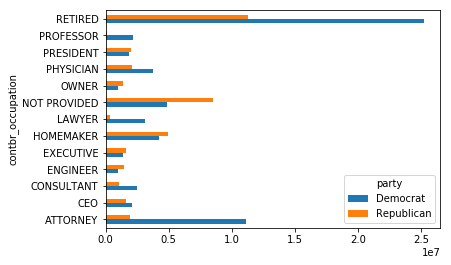

In [107]:
over_2mm.plot(kind='barh')

### 9.5.2 기부금액

In [110]:
bins = np.array([0,2,10,100,1000,10000,100000,1000000, 10000000])
labels = pd.cut(fec.contb_receipt_amt, bins)
labels

0            (100, 1000]
1              (10, 100]
2            (100, 1000]
3            (100, 1000]
4            (100, 1000]
5            (100, 1000]
6            (100, 1000]
7            (100, 1000]
8            (100, 1000]
9            (100, 1000]
10           (100, 1000]
11           (100, 1000]
12           (100, 1000]
13           (100, 1000]
14           (100, 1000]
15           (100, 1000]
16           (100, 1000]
17           (100, 1000]
18           (100, 1000]
19           (100, 1000]
20           (100, 1000]
21           (100, 1000]
22         (1000, 10000]
23         (1000, 10000]
24           (100, 1000]
25           (100, 1000]
26             (10, 100]
27           (100, 1000]
28           (100, 1000]
29           (100, 1000]
               ...      
1001701    (1000, 10000]
1001702    (1000, 10000]
1001703              NaN
1001704              NaN
1001705      (100, 1000]
1001706    (1000, 10000]
1001707              NaN
1001708    (1000, 10000]
1001709              NaN


In [112]:
grouped = fec.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contb_receipt_amt,,,,,,,,,,,,,
"(0, 2]",101.0,25.0,18.0,NaN,4.0,NaN,690.0,73.0,1.0,NaN,17.0,133.0,15.0
"(2, 10]",115.0,576.0,743.0,120.0,27.0,1.0,39873.0,2340.0,8.0,14.0,763.0,3625.0,635.0
"(10, 100]",7480.0,7331.0,26466.0,918.0,446.0,12.0,372280.0,99957.0,324.0,1044.0,5053.0,31853.0,28231.0
"(100, 1000]",5121.0,11315.0,17961.0,2170.0,645.0,55.0,153991.0,39333.0,1800.0,5039.0,11.0,43357.0,15989.0
"(1000, 10000]",265.0,805.0,1695.0,858.0,112.0,5.0,22284.0,1456.0,1711.0,6612.0,NaN,26186.0,1375.0
"(10000, 100000]",NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN
"(100000, 1000000]",NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
"(1000000, 10000000]",NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contb_receipt_amt,,,,,,,,,,,,,
"(0, 2]",104.00,27.00,8.67,NaN,5.86,NaN,696.09,9.903000e+01,1.00,NaN,22.00,153.72,16.88
"(2, 10]",870.50,4167.47,6511.50,872.50,214.64,10.0,336889.77,2.009854e+04,79.00,108.00,6329.28,29742.94,5751.39
"(10, 100]",465668.63,507428.77,1793799.88,59053.00,27536.34,815.0,20288981.41,5.938243e+06,25695.00,74645.82,364458.62,1987783.76,1778505.33
"(100, 1000]",1654273.16,4644739.05,6702011.53,1163657.29,273145.76,25805.0,54798531.46,1.187462e+07,1027516.61,2959292.45,2200.00,22363381.69,5969946.71
"(1000, 10000]",590523.00,1944719.60,4330438.11,2106790.69,266059.00,12400.0,51753705.67,3.126558e+06,4951527.87,17271707.73,NaN,63942145.42,3288939.00
"(10000, 100000]",NaN,NaN,NaN,NaN,NaN,NaN,59100.00,5.000000e+04,NaN,NaN,NaN,12700.00,NaN
"(100000, 1000000]",NaN,NaN,NaN,NaN,NaN,NaN,1490683.08,NaN,NaN,NaN,NaN,NaN,NaN
"(1000000, 10000000]",NaN,NaN,NaN,NaN,NaN,NaN,7148839.76,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contb_receipt_amt,,,,,,,,,,,,,
"(0, 2]",0.091691,0.023804,0.007644,NaN,0.005166,NaN,0.613701,0.087309,0.000882,NaN,0.019396,0.135526,0.014882
"(2, 10]",0.002115,0.010124,0.015818,0.002120,0.000521,0.000024,0.818398,0.048825,0.000192,0.000262,0.015376,0.072254,0.013972
"(10, 100]",0.013979,0.015232,0.053847,0.001773,0.000827,0.000024,0.609048,0.178258,0.000771,0.002241,0.010941,0.059671,0.053388
"(100, 1000]",0.014580,0.040938,0.059070,0.010256,0.002407,0.000227,0.482980,0.104660,0.009056,0.026082,0.000019,0.197105,0.052618
"(1000, 10000]",0.003845,0.012662,0.028196,0.013717,0.001732,0.000081,0.336970,0.020357,0.032240,0.112457,NaN,0.416329,0.021414
"(10000, 100000]",NaN,NaN,NaN,NaN,NaN,NaN,0.485222,0.410509,NaN,NaN,NaN,0.104269,NaN
"(100000, 1000000]",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
"(1000000, 10000000]",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


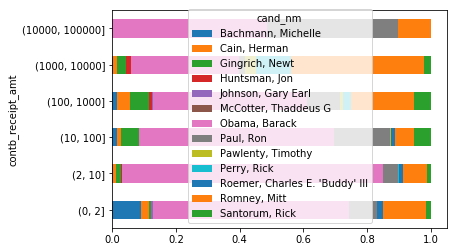

In [115]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### 9.5.3 주별 기부 통계

In [116]:
grouped = fec.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contbr_st,,,,,,,,,,,,,
AE,1750.00,1005.00,7025.00,300.0,0.00,0.0,42973.75,54186.33,0.00,1550.00,310.00,5680.00,3230.00
AK,8235.50,30653.92,31091.00,2500.0,2350.00,0.0,275353.15,127619.89,250.00,3900.00,750.00,86204.24,23011.97
AL,25507.00,93936.87,187275.00,4500.0,4200.00,0.0,537835.48,219450.81,15300.00,31099.96,5958.24,504882.08,171896.18
AR,19156.00,54961.02,66438.00,13604.0,500.00,0.0,324802.28,116415.39,13350.00,29565.00,2011.00,105351.50,47183.25
AZ,64427.00,241641.63,244186.62,60618.0,9650.00,0.0,1484241.84,534411.79,90075.00,79074.00,6366.12,1850484.23,182290.17
CA,357464.77,568345.91,1282996.13,403495.0,84784.88,1030.0,23370680.84,2781956.09,772830.00,1585080.60,38376.17,10908232.46,962950.83
CO,59754.65,126384.66,196754.88,20525.0,39980.00,0.0,2104551.38,467736.64,75168.36,228033.33,4480.00,1477810.82,296152.81
CT,32015.00,69018.12,148375.00,93498.0,7925.00,0.0,2037216.66,264974.93,68300.00,60750.00,4665.00,3377421.85,85146.04
DC,3085.00,9970.00,33810.00,93776.5,6500.00,0.0,4317865.85,42862.33,34490.00,71400.00,2020.00,999740.50,30382.24


In [117]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contbr_st,,,,,,,,,,,,,
AE,0.014829,0.008516,0.059529,0.002542,0.000000,0.000000,0.364153,0.459167,0.000000,0.013134,0.002627,0.048131,0.027371
AK,0.013913,0.051787,0.052526,0.004224,0.003970,0.000000,0.465187,0.215603,0.000422,0.006589,0.001267,0.145635,0.038877
AL,0.014156,0.052134,0.103935,0.002497,0.002331,0.000000,0.298492,0.121793,0.008491,0.017260,0.003307,0.280203,0.095400
AR,0.024146,0.069278,0.083745,0.017148,0.000630,0.000000,0.409413,0.146741,0.016828,0.037267,0.002535,0.132795,0.059474
AZ,0.013291,0.049849,0.050374,0.012505,0.001991,0.000000,0.306189,0.110246,0.018582,0.016312,0.001313,0.381743,0.037605
CA,0.008290,0.013181,0.029755,0.009358,0.001966,0.000024,0.542014,0.064519,0.017924,0.036761,0.000890,0.252984,0.022333
CO,0.011723,0.024794,0.038600,0.004027,0.007843,0.000000,0.412873,0.091761,0.014747,0.044736,0.000879,0.289918,0.058100
CT,0.005123,0.011044,0.023743,0.014961,0.001268,0.000000,0.325991,0.042401,0.010929,0.009721,0.000746,0.540448,0.013625
DC,0.000546,0.001766,0.005988,0.016610,0.001151,0.000000,0.764779,0.007592,0.006109,0.012646,0.000358,0.177074,0.005381
